# DATA UNDERSTANDING

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

Load the dataset

In [2]:
df = pd.read_csv('day.csv')

Display basic information and overview

In [3]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

First 5 Rows of the Dataset:
   instant      dteday  season  yr  mnth  ho

# DATA CLEANING

Drop irrelevant columns - These do not contribute to the prediction

In [4]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

Convert categorical columns to appropriate types

In [5]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_cols] = df[categorical_cols].astype('category')

One-hot encoding of categorical variables - Convert categorical variables to dummy variables

In [6]:
df = pd.get_dummies(df, drop_first=True)

Check for missing values

In [7]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
temp            0
atemp           0
hum             0
windspeed       0
cnt             0
season_2        0
season_3        0
season_4        0
yr_1            0
mnth_2          0
mnth_3          0
mnth_4          0
mnth_5          0
mnth_6          0
mnth_7          0
mnth_8          0
mnth_9          0
mnth_10         0
mnth_11         0
mnth_12         0
holiday_1       0
weekday_1       0
weekday_2       0
weekday_3       0
weekday_4       0
weekday_5       0
weekday_6       0
workingday_1    0
weathersit_2    0
weathersit_3    0
dtype: int64


# BIVARIATE ANALYSIS

In [8]:
# Univariate Analysis - Distribution of individual numerical variables
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.set_style('whitegrid')

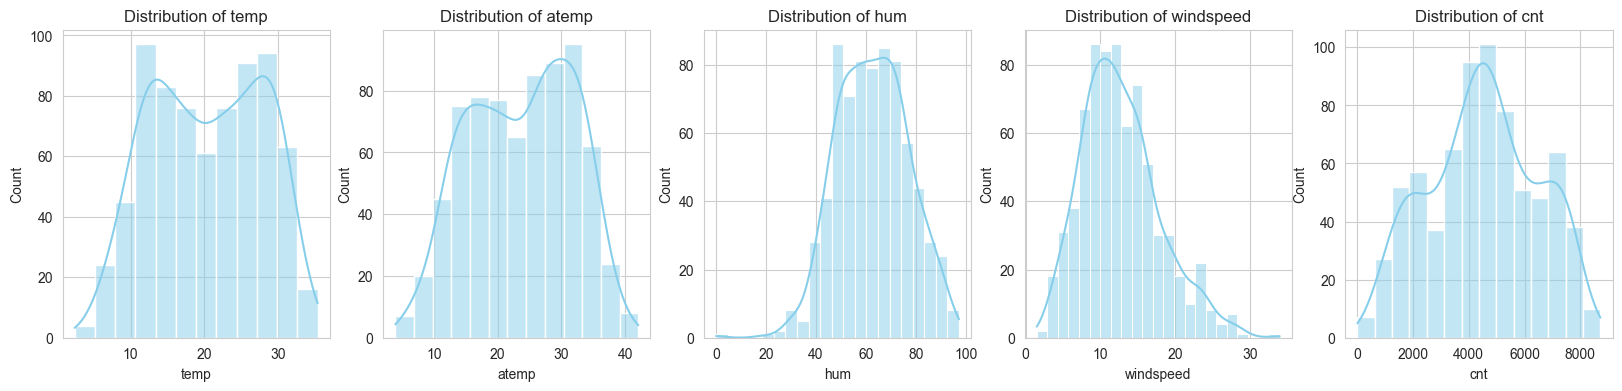

In [9]:
# Plot all histograms
fig, axs = plt.subplots(ncols=len(numerical_cols), figsize=(20, 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Distribution of {col}')
plt.show()

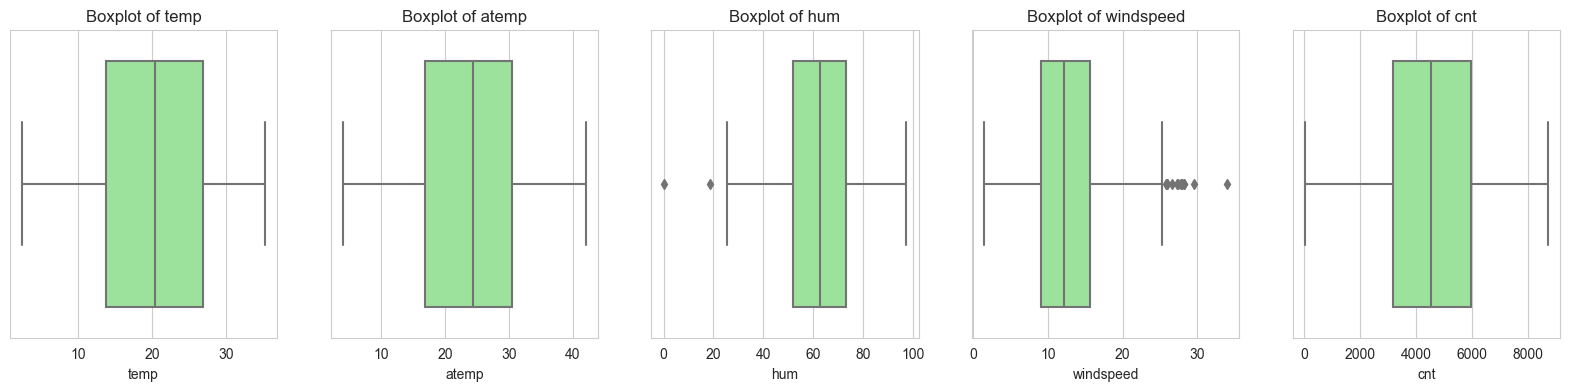

In [10]:
# Plot all boxplots
fig, axs = plt.subplots(ncols=len(numerical_cols), figsize=(20, 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axs[i], color='lightgreen')
    axs[i].set_title(f'Boxplot of {col}')
plt.show()

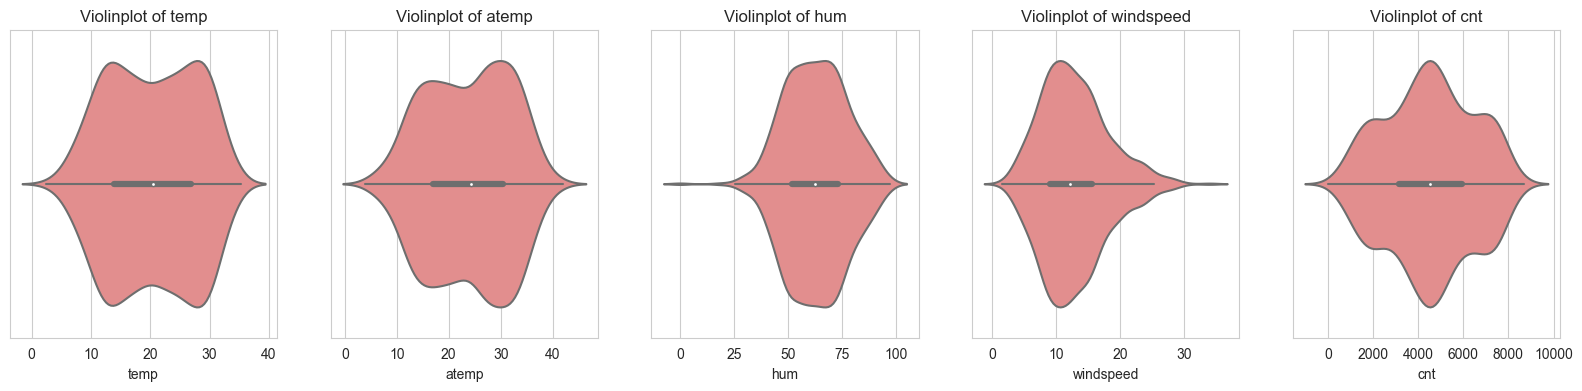

In [11]:
# Plot all violin plots
fig, axs = plt.subplots(ncols=len(numerical_cols), figsize=(20, 4))
for i, col in enumerate(numerical_cols):
    sns.violinplot(x=df[col], ax=axs[i], color='lightcoral')
    axs[i].set_title(f'Violinplot of {col}')
plt.show()

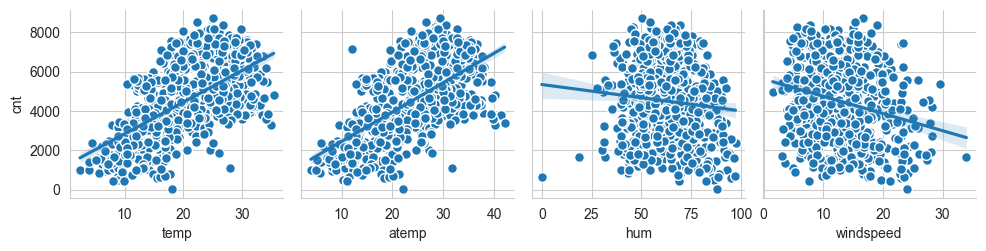

In [12]:
# Bivariate Analysis - Relationship between target variable and features
sns.pairplot(df, y_vars=['cnt'], x_vars=numerical_cols[:-1], kind='reg', markers='o', plot_kws={'scatter_kws': {'alpha': 1, 's': 50, 'edgecolor': 'white'}})
plt.show()



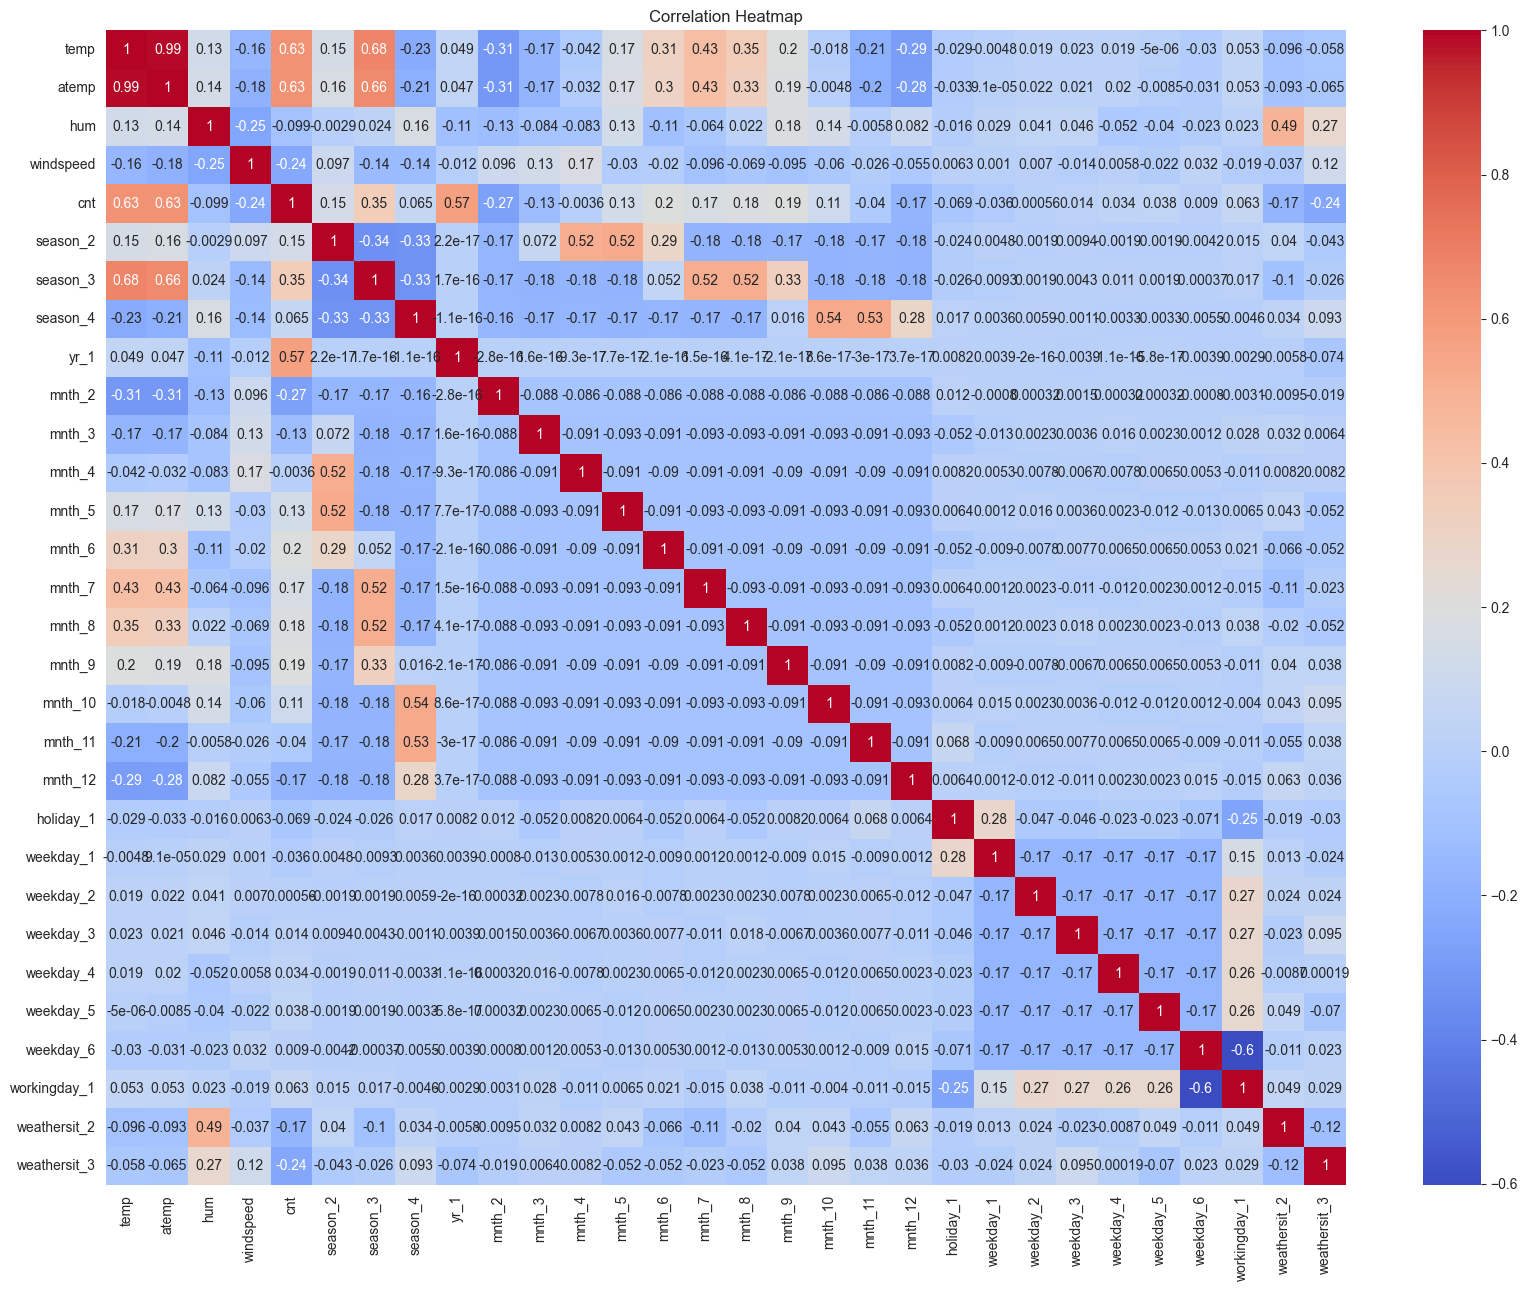

In [13]:
# Correlation Heatmap - Identify correlated features
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# DATA PREPARATION

In [14]:
# Splitting the data into train and test sets
X = df.drop('cnt', axis=1)  # Independent variables
y = df['cnt']               # Target variable


In [15]:
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL BUILDING

In [16]:
# Building the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Recursive Feature Elimination (RFE)

In [17]:
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train, y_train)

print("\nSelected Features by RFE:", X.columns[rfe.support_].tolist())

X_train_rfe = X_train[X.columns[rfe.support_]]
X_test_rfe = X_test[X.columns[rfe.support_]]



Selected Features by RFE: ['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3']


# Model 1 - Initial Model

In [18]:
# Predicting on the test set
y_pred = lr.predict(X_test)

In [19]:
# Evaluate the model - R-squared score measures the model's accuracy
r2 = r2_score(y_test, y_pred)
print("\nModel 1 - R-squared Score (Model Accuracy):", r2)


Model 1 - R-squared Score (Model Accuracy): 0.8368179276158043


# Model 2 - RFE Model

In [20]:
lr_rfe = LinearRegression()
lr_rfe.fit(X_train_rfe, y_train)

y_pred_rfe = lr_rfe.predict(X_test_rfe)

r2_rfe = r2_score(y_test, y_pred_rfe)
print("\nModel 2 (RFE) - R-squared Score:", r2_rfe)


Model 2 (RFE) - R-squared Score: 0.7333568278737421


# Model 3 - Reduced Features Model

In [21]:
# Check available feature names
print("\nAvailable Features in X_train:", X_train.columns.tolist())


Available Features in X_train: ['temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3']


In [22]:
# Using only the most significant features manually
significant_features = ['temp', 'atemp', 'hum', 'yr_1', 'windspeed', 'season_2', 'season_3']

X_train_reduced = X_train[significant_features]
X_test_reduced = X_test[significant_features]

lr_reduced = LinearRegression()
lr_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = lr_reduced.predict(X_test_reduced)

r2_reduced = r2_score(y_test, y_pred_reduced)
print("\nModel 3 (Reduced) - R-squared Score:", r2_reduced)


Model 3 (Reduced) - R-squared Score: 0.7349934145550361


# Conclusion - Final Model and Insights

In [23]:
# Check for multicollinearity using VIF (Variance Inflation Factor)
numeric_X = X.select_dtypes(include=[np.number])

vif = pd.DataFrame()
vif['Features'] = numeric_X.columns
vif['VIF'] = [variance_inflation_factor(numeric_X.values, i) for i in range(numeric_X.shape[1])]
print("\nVariance Inflation Factor (VIF) Values:")
print(vif)


Variance Inflation Factor (VIF) Values:
    Features         VIF
0       temp  488.306256
1      atemp  542.888840
2        hum   11.071034
3  windspeed    4.678072


# Residual Analysis

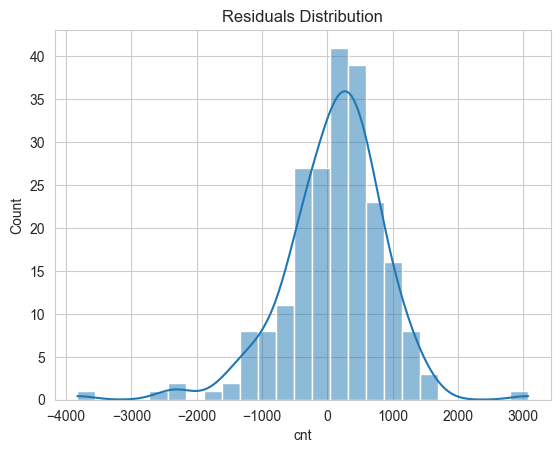

In [24]:
# Residual analysis - Analyze errors to check model assumptions
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

Prediction on Test Data

In [25]:
# Displaying sample predictions
sample_predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample Predictions:")
print(sample_predictions.head())


Sample Predictions:
   Actual    Predicted
0    7460  6152.040942
1    4788  4298.864415
2    3331  3711.722313
3    3068  1741.545978
4    7338  7200.656322


# FINAL EQUATION

In [26]:
# Final Equation - Displaying the linear regression formula
coefficients = lr.coef_
intercept = lr.intercept_
print("\nFinal Linear Regression Equation:")
equation = "cnt = {:.2f}".format(intercept) + " + " + " + ".join(["{:.2f}*{}".format(coeff, feature) for coeff, feature in zip(coefficients, X.columns)])
print(equation)


Final Linear Regression Equation:
cnt = 1283.75 + 49.84*temp + 57.28*atemp + -14.16*hum + -35.19*windspeed + 1312.94*season_2 + 1218.92*season_3 + 1855.35*season_4 + 1953.19*yr_1 + 124.19*mnth_2 + 446.13*mnth_3 + -35.86*mnth_4 + 238.42*mnth_5 + -12.79*mnth_6 + -371.50*mnth_7 + -103.24*mnth_8 + 604.04*mnth_9 + 299.39*mnth_10 + -438.83*mnth_11 + -332.79*mnth_12 + -301.92*holiday_1 + -53.08*weekday_1 + -120.67*weekday_2 + 29.09*weekday_3 + 52.85*weekday_4 + 109.68*weekday_5 + 390.76*weekday_6 + 319.78*workingday_1 + -483.91*weathersit_2 + -1874.02*weathersit_3
